# Chapter 2: Statistical Learning

### Imports

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score

from typing import Callable
import numpy.typing as npt

## Equations

### Mean Squared Error
$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{f}(x_i))^2
$$
*pg. 28*

In [83]:
def mse(x: npt.ArrayLike, y: npt.ArrayLike, f_hat: Callable[[npt.ArrayLike], float]) -> float:
    '''
    Calculates the Mean Squared Error for a predictor function.
    ## Parameters
    x : array-like 
        An array of observations.
    y : array-like 
        An array of response variables.
    f_hat : callable
        A function that predicts `y_i`, given `x_i`.

    ## Returns
    MSE : float
        A value for the mean squared error of the predictor on the supplied data.
    '''
    n = len(y)

    return 1/n * sum( (y[i] - f_hat(x[i]))**2  for i in range(n))

### Classification Error Rate

$$
\frac{1}{n}\sum_{i=1}^{n}I(y_i\neq\hat{y}_i)
$$
*pg. 35*


In [84]:
def classification_error_rate(y: npt.ArrayLike, y_hat: npt.ArrayLike) -> float:
    '''
    Calculates the Error Rate for an array of predicted labels and true labels.
    ## Parameters
    y : array-like 
        An array of true labels.
    y_hat : array-like 
        An array of predicted labels.

    ## Returns
    error_rate : float
        A value for the error rate, the fraction of incorrect classifications
    '''
    n = len(y)

    # This is purposefully written in a verbose and redundant way to reflect the nature of the indicator variable 'I'
    return 1/n * sum( I := (1 if y[i] != y_hat[i] else 0)  for i in range(n))

### Bias Variance Tradeoff

Equation for the decomposed sum for expected test MSE.
$$
E\left(y_0-\hat{f}(x_0)\right)^2 = \text{Var}(\hat{f}(x_0)+[\text{Bias}(\hat{f}(x_0))]^2+\text{Var}(\epsilon)
$$
*pg. 32*

In [85]:
def bias_variance_tradeoff():
    pass

## Examples

### Mean Squared Error

Expected 0 MSE

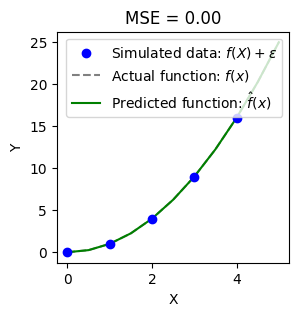

In [86]:
x = np.arange(5)
f = lambda x: x ** 2
y = f(x)

# Perfect estimator 
f_hat = f

plt.figure(figsize=(3,3))

for i, point_x in enumerate(x):
    plt.vlines(point_x, y[i], f_hat(point_x), "k", ":", zorder=0)

plt.scatter(x, y, c='b', label="Simulated data: $f(X) + \epsilon$", zorder=3)

axis = np.linspace(0, 5, 11)
plt.plot(axis, f(axis), '--', c='gray', label="Actual function: $f(x)$", zorder=1)
plt.plot(axis, f_hat(axis), color='green', label="Predicted function: $\hat{f}(x)$", zorder=2)

plt.title(f"MSE = {mse(x, y, f_hat):.2f}")
plt.xlabel("X")
plt.ylabel("Y")

plt.legend();

Expected >0 MSE

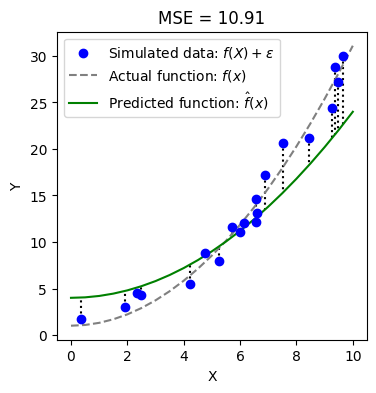

In [87]:
x = np.random.rand(20) * 10
f = lambda x: 0.3*x**2 + 0.01*x + 1
epsilon = (np.random.rand(20) - 0.5) * 5

y = f(x) + epsilon

# Approximation of f
f_hat = lambda x: 0.2*x**2 + 4

plt.figure(figsize=(4,4))

for i, point_x in enumerate(x):
    plt.vlines(point_x, y[i], f_hat(point_x), "k", ":", zorder=0)

plt.scatter(x, y, c='b', label="Simulated data: $f(X) + \epsilon$", zorder=3)

axis = np.linspace(0, 10, 21)
plt.plot(axis, f(axis), '--', c='gray', label="Actual function: $f(x)$", zorder=1)
plt.plot(axis, f_hat(axis), color='green', label="Predicted function: $\hat{f}(x)$", zorder=2)

mse = mse(x, y, f_hat)

plt.title(f"MSE = {mse:.2f}")
plt.xlabel("X")
plt.ylabel("Y")

plt.legend();

Comparison

In [88]:
y_pred = f_hat(x)

sklearn_mse = mean_squared_error(y, y_pred)
numpy_mse = np.square(np.subtract(y,y_pred)).mean() 

print(
f'''this: {mse:.2f}
sklearn: {sklearn_mse:.2f}
numpy_mse: {numpy_mse:.2f}''')


this: 10.91
sklearn: 10.91
numpy_mse: 10.91


### Classification error rate

In [89]:
y = np.random.randint(1, 10, 10)

y_hat = y.copy()
y_hat[[0, 1]] +=1

print("Y: " + str(y))
print("Y_hat: " + str(y_hat))

cer = classification_error_rate(y, y_hat)
sklearn_cer = 1 - accuracy_score(y, y_hat)

print(
f'''this: {cer:.2f}
sklearn: {sklearn_cer:.2f}''')

Y: [8 4 6 7 1 9 9 1 6 9]
Y_hat: [9 5 6 7 1 9 9 1 6 9]
this: 0.20
sklearn: 0.20
